## Model ODE Models: a list

### Exponential growth or decay
The most important ordinary differential equation in the world is: 
$$\frac{dy}{dt} = ay.$$
This is appropriate for unbounded, exponential growth. 
For decay, we usually write the minus sign explicitly instead of letting the constant $a$ take a negative value:
$$\frac{dy}{dt} = -ay.$$
These equations describe unchecked population growth, the value of investments (or debts) with interest, radioactive decay, and the difference between the temperature of an object and its surroundings. 

### Constrained growth
Appropriate when a population approaches a finite value, called the *carrying capacity*. 
$$\frac{dy}{dt} = ay\left(1-\frac{y}{c}\right)$$
Assume $a>0$, $c>0$, $y>0$. 

This model is also called *logistic growth*. First proposed by a Belgian, Pierrre Verhulst, who tried to predict the carrying capacity of France. It is not well known that he also made a crude effort to model the human population of North America, coldly taking into account... what was happening in the early 1800s. Ask me for more info if you want to look under this rock. 

### Lotka-Volterra predator-prey dynamics
The basic version of the model includes one prey species $r(t)$ and one predator species $w(t)$. 

\begin{align}
\frac{dr}{dt} &= Ar - Brw \\
\frac{dw}{dt} &= Crw - Dw.
\end{align}
Assume all variables and parameters are nonnegative.
Note that if $w=0$ this becomes exponential growth for rabbits: without wolves, the rabbit population will explode. If $r=0$ this becomes exponential decay for wolves: without rabbits, the wolf population will decrease to zero. When both rabbits and wolves are present, the $-Brw$ term acts to reduce the rabbit population, while the $Crw$ term acts to increase the wolf population. 


### SIR epidemic model
The basic version: divide the population into Susceptible, Infected and Recovered subgroups. The equations are:
\begin{align}
\frac{dS}{dt} &= -\beta S I \\
\frac{dI}{dt} &= \beta SI -\gamma I\\
\frac{dR}{dt} &= \gamma I.
\end{align}
This model emerges from a story encoding many assumptions: in some town or region with a total population of $N$, each person interacts with $m$ randomly chosen people each day. For each Susceptible-Infected interaction, there is a probability $p$ of transmission of the disease, in which case the Suseptible person becomes Infected. The Infected people eventually heal, after an average of $d$ days, and then they join the Recovered group. In this final stage they do not spread the disease and cannot become reinfected. The constants $\beta$ and $\gamma$ can be obtained from $N$, $m$, $p$, and $d$. 

Note that in the absence of Susceptible people, the Infected population decays exponentially. 


### Spring equation
Many systems return to a stable equilibrium position when perturbed. A basic model for this is the spring equation:
$$
m y''(t) = -ry'(t) - ky(t).
$$
Imagine a spring anchored to a wall on the left and attached to a mass on the right. Ignore gravity. The spring has a neutral, preferred resting position where $y=0$. If $y>0$, the spring is overextended and will try to pull the ball back toward the preferred position: this explains the $-ky$ term. The $-ry'$ term acts in the opposite direction of the current velocity of the ball: what is this force doing? 

Generalizations: add gravity or several space dimensions; let the spring force be nonlinear (e.g. if you really really stretch the spring, it deforms and loses the ability to exert any force); let the friction force be nonlinear (for example, if the system is immersed in oil rather than air). 

### Lanchester's model of war
Let $A$ and $B$ denote the sizes of two armies: the number of soldiers, or ships, or tanks, etc. Here I'll use the language of ships, since it allows for the possibilty that all of the people jump onto rafts and survive if their ship sinks. Let time be measured in hours. 
Suppose that each ship can sink $r$ other ships per hour. Then the rate of destruction of ships by the first army is $rA$ ships per hour, while the rate of destruction of ships by the second army is $rB$ ships per hour. Therefore we get the model:

\begin{align}
A' = -r B\\
B' = -r A.
\end{align}

This model predicts that the larger army will always win, and it also allows you to predict what fraction of the victorious army will survive. 
A grim branch of military science has found that this simple model accurately predicts casualty figures for many historical battles; the basic model has been generalized and adapted in numerous ways. A somewhat lighter application of this model is to help AI systems play video games. 

Personal note: studying this model makes me hum a famous gospel song: *I’m going to lay down my sword and shield, I’m going to lay down my burden, down by the riverside, and study war no more.* But I don't actually carry out that lofty intention: I enjoy an occasional game of Starcraft (as Zerg, if you want to know). 


### Three-body gravitation
Let $\vec A$, $\vec B$ and $\vec C$ be the (vector) positions of three bodies such as planets. Let their masses be $m_1$, $m_2$, and $m_3$. Let $G$ be the gravitational constant. Then we have 
\begin{align}
\frac{d^2 \vec{A}}{dt} &= -G m_2 \frac{\vec A-\vec B}{|\vec A-\vec B|^3}-G m_3 \frac{\vec A-\vec C}{|\vec A-\vec C|^3}\\
\frac{d^2 \vec{B}}{dt} &= -G m_1 \frac{\vec B-\vec A}{|\vec B-\vec A|^3}-G m_3 \frac{\vec B-\vec C}{|\vec B-\vec C|^3}\\
\frac{d^2 \vec{C}}{dt} &= -G m_1 \frac{\vec C-\vec A}{|\vec C-\vec A|^3}-G m_2 \frac{\vec C-\vec B}{|\vec C-\vec B|^3}.
\end{align}
Note some similarity to the spring equation: there are second derivative terms on the left, and negative  terms on the right. Why isn't there a first-derivative term? 

### Lorentz system
A famous example of a chaotic system. This equation emerged from an attempt to model weather (details, assumptions, and interpretation omitted). 
\begin{align}
u' &= 10(v-u)\\
v' &= 2 (28-w) - v\\
w' &= uv - \frac{8}{3}w.
\end{align}
If you change the constants, you might not see the desired chaotic behavior. 

## Computational examples
These are not minimal examples; I'm using some advanced solver features and plotting tools. 

Don't memorize but feel free to copy and modify. 

#### Constrained growth demo

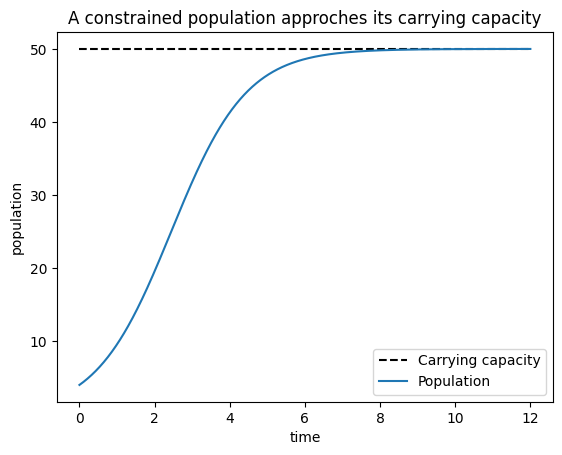

In [69]:
# start with imports 
from numpy import *
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
# set parameter values 
r = 1
c = 50
# define differential equation
def constrainedgrowth(t,var):
    y = var[0]
    dydt = r*y*(1-y/c)
    return array([dydt])
# set initial condition
y0 = 4
ic = array([y0])
# decide for how long the simulation should run
tfinal = 12
# the solver
u = solve_ivp(
    constrainedgrowth, 
    array([0,tfinal]),
    ic,
    dense_output = True,
    rtol = 1e-8,
    atol = 1e-8)

assert u.success # this line will throw an error if the solver fails for some reason

# plot population as function of time
fig,ax = plt.subplots()
t = linspace(0,tfinal,1000)
y = u.sol(t)[0,:]
cvec = c + 0*t
ax.plot(t,cvec,'k--',label="Carrying capacity",lw=1.5)
ax.plot(t,y,label="Population",lw=1.5)
ax.set_xlabel("time")
ax.set_ylabel("population")
ax.set_title("A constrained population approches its carrying capacity")
ax.legend()
fig.savefig("growthdemo1.pdf")

#### Predator-prey demo

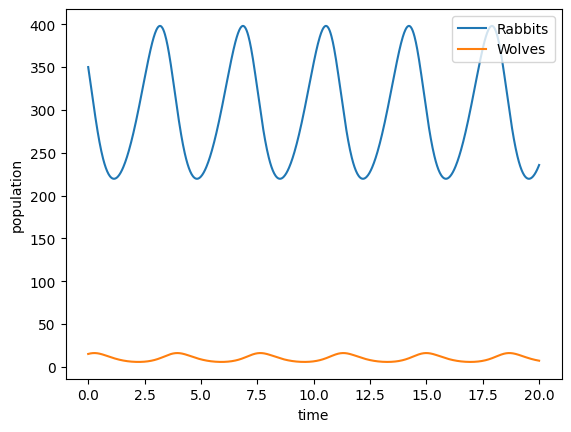

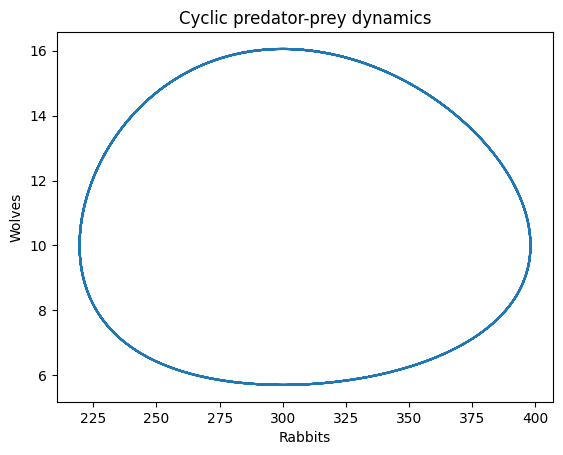

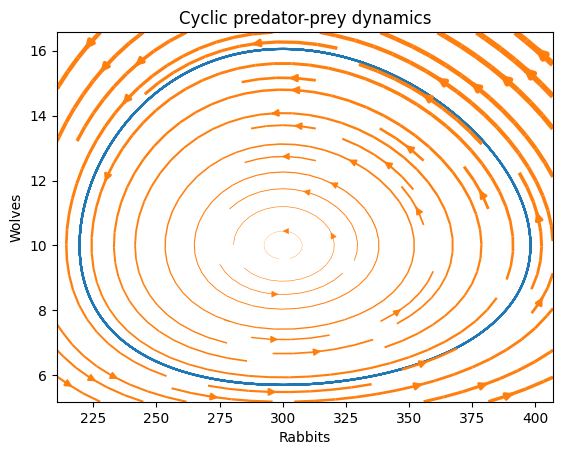

In [15]:
# start with imports 
from numpy import *
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
# set parameter values 
a = 1
b = 0.1
c = 0.01
d = 3
# define differential equations
def predatorprey(t,var):
    r = var[0]
    w = var[1]
    drdt = a*r - b*r*w
    dwdt = c*r*w - d*w
    return stack([drdt, dwdt])
# set initial conditions
r0 = 350
w0 = 15
ic = array([r0,w0])
# say for how long the simulation should run
tfinal = 20
# call the solver
u = solve_ivp(
    predatorprey, 
    array([0,tfinal]),
    ic,
    dense_output = True,
    rtol = 1e-8,
    atol = 1e-8)

assert u.success # this line will throw an error if the solver fails for some reason

# create a first plot: r and w as functions of time
fig,ax = plt.subplots()
t = linspace(0,tfinal,1000)
r = u.sol(t)[0,:]
w = u.sol(t)[1,:]
ax.plot(t,r,label="Rabbits",lw=1.5)
ax.plot(t,w,label="Wolves",lw=1.5)
ax.set_xlabel("time")
ax.set_ylabel("population")
ax.legend(loc="upper right")
fig.savefig("PPdemo1.pdf")

# create a second plot: r versus w, time implicit (phase diagram)
fig,ax = plt.subplots()
t = linspace(0,tfinal,1000)
r = u.sol(t)[0,:]
w = u.sol(t)[1,:]
ax.plot(r,w,label="PP",lw=1.5)
ax.set_xlabel("Rabbits")
ax.set_ylabel("Wolves")
ax.set_title("Cyclic predator-prey dynamics")
fig.savefig("PPdemo2.pdf")

# a third plot, equal to the second but with "stream" overlay
fig,ax = plt.subplots()
t = linspace(0,tfinal,1000)
r = u.sol(t)[0,:]
w = u.sol(t)[1,:]
ax.plot(r,w,label="PP",lw=1.5)
ax.set_xlabel("Rabbits")
ax.set_ylabel("Wolves")
ax.set_title("Cyclic predator-prey dynamics")
xmin,xmax = ax.get_xlim() # reuse the same axis boundaries for the streamplot
ymin,ymax = ax.get_ylim()
xx = linspace(xmin,xmax,17) # use a 17x17 grid for computing other trajectories
yy = linspace(ymin,ymax,17) 
X,Y = meshgrid(xx,yy,indexing='xy')
U,V = predatorprey(0,stack((X,Y)))
speed = sqrt((U/(xmax-xmin))**2 + (V/(ymax-ymin))**2)
lw = 5*speed / speed.max() 
ax.streamplot(X,Y,U,V,density=0.8,linewidth=lw)
fig.savefig("PPdemo3.pdf")



## Questions

Q0. Which of these models have you seen before? Which have you studied in detail? Which are new to you? 

Q1. Consider the first model, exponential growth and decay. We might want to apply it to the following scenarios. How reasonable would it be in each case? If you think the model ignores something important, comment on that as well. 
- the population of yeast cells after I mix them into bread dough
- the population of blue whales in the world's oceans, once commercial harvesting ended
- the worldwide human population between now and 2100

Q2. Pick one of the models. Try to list the assumptions that it relies on. Describe a scenario wherein those assumptions might fail. 

Q3. The spring equation is written here as a single equation involving a second-order derivative. It is also possible to write it as a system of two equations where the unknowns are position, $y(t)$ and velocity, $v(t)$.  Of course $y'  = v$; that is one of the equations. The other equation is $v' = ...$ where the right-hand side uses $y$ and $v$ but not (explicitly) $y'$ or $v'$.  Write it this way and then adapt the predator-prey code so that you can solve a spring IVP. Find parameter values so that the spring oscillates three times between $t=0$ and approximately $t=10$. Decide which kind of figure is appropriate to describe this behavior; update the axes labels and plot title appropriately also. 

Q4. Pick another of the models (not constrained growth or predator-prey or the spring system) and adapt the computational demos. Remember to update the axes labels and plot title. 

Q5. In the predator-prey model, suppose that the rabbit population would follow a constrained growth model, in the abscence of wolves. How would this assumption appear in the equations? Suppose the rabbit carrying capacity is 380 and re-solve the model computationally; how does this affect the behavior of the system? 

Q6. In the original predator-prey model, the term $-Brw$ describes the rate at which rabbits are eaten by wolves.  In particular, this model predicts that if the rabbit population doubles while the wolf population remains unchanged, then those wolves will eat twice as many rabbits. This might make sense if there are relatively few rabbits and it's hard for the wolves to find them (doubling the rabbit population makes it more likely that a wolf will find one). On the other hand, this is unrealistic if the rabbits are numerous and easy to find and there are only a few wolves. An individual wolf can only eat so many rabbits! Thus, some modelers replace the $-Brw$ term with something like 
$$
- B\rho \frac{r}{\rho + r}w
$$
where $\rho$ is a new parameter. 
- Explain the implications of this alternate version by describing what happens when $r$ is much smaller than $\rho$ or much larger than $\rho$. 
- When rabbits are abundant, what's the rate at which one wolf will consume them, in terms of $B$ and $\rho$? 

Q7. Propose a new equation for the wolf population in the predator-prey model, by using a constrained-growth model where the wolf carrying capacity depends on the rabbit population. Implement your model using the original rabbit equation. Does this change affect the observed dynamics?  

Q8. The basic SIR model is more applicable to some infectious diseases than others. Suppose we want to model or predict the spread of a sexually transmitted infection like syphilis within the Twin Cities. What would be your top priorities in altering the model? What new information would you need? 

Q9. Write an equation modeling a fishery. The fish population should follow a constrained growth model, but the carrying capacity can vary in time (e.g. with seasons or following some multi-year cycle). For example, you could use something like $c=c(t) = \alpha + \beta\sin(\omega t)$ where $\alpha>\beta$.  Include another term that accounts for some human fishing activity reducing the fish population. Explain your choices. *A simple model, well explained, is the goal; don't feel pressure to make this complicated. You don't need to solve the model computationally.*

Q10. A simpler gravity problem would ignore one planet (drop C) and assume that another is frozen in place (fix B at the origin). This could describe the Earth-Sun system, for example. If we let $x$ and $y$ denote the 2D coordinates of the moving planet (restrict A to a plane) then the distance $|A-B|$ is just $\sqrt{x^2+y^2}$ and we get the equations  
\begin{align}
x''= -G m \frac{x}{(x^2+y^2)^{3/2}}\\
y''= -G m \frac{y}{(x^2+y^2)^{3/2}}
\end{align}
where $m$ is the mass of the Sun. Write this as a system of four first-order equations (the velocities can be $u=x'$ and $v=y'$). Solve it computationally and find initial conditions so that the orbit is close to circular, but not perfectly circular. Use the plotting command **ax.set_aspect("equal")** so that an ellipse looks like an ellipse. For reference, the mass of the Sun is about $2\cdot 10^30$ kilograms, the gravitational constant is $6.6\times10^{-11}$ $N m^2/kg^2$, the Earth is about $1.5\cdot 10^11$ meters from the sun, and Earth's velocity is about $2\pi \cdot 1.5\cdot 10^11 / (3\cdot10^7)$ meters per second. You don't need to use these exact numbers. 